In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
data=pd.read_csv("/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [13]:
#Applying regression
X = data.drop(['Sales', 'Unnamed: 0'], axis=1)
Y=data['Sales'].values.reshape(-1,1)
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
reg=LinearRegression()
reg.fit(x_train,y_train)

(150, 3)
(150, 1)
(50, 3)
(50, 1)


LinearRegression()

In [14]:
#Displaying coefficients and intercept
print("Slope: ",reg.coef_)
print("Intercept: ",reg.intercept_)
print("The equation is y = ",reg.intercept_," + ",reg.coef_[0][0]," * TV + ",reg.coef_[0][1]," * radio + ",reg.coef_[0][2]," * newspaper")

Slope:  [[0.04656457 0.17915812 0.00345046]]
Intercept:  [2.87696662]
The equation is y =  [2.87696662]  +  0.046564567874150295  * TV +  0.17915812245088839  * radio +  0.0034504647111804343  * newspaper


In [18]:
#Making predictions on the testing set
y_pred = reg.predict(x_test)
def myfunc(tv,radio,newspaper):
  return 2.877 + 0.046565*tv + 0.17916*radio + 0.0034505*newspaper

predicted_sales = myfunc(39.5,41.1,10.8)
print(predicted_sales)

def myfunc(TV,radio):
  Y = 2.927 + 0.0466*TV + 0.1811*radio
  return Y
predictedsales = myfunc(39.5,41.1)
print("Predicted Sales is ", predictedsales)

12.117058900000002
Predicted Sales is  12.21091


In [21]:
# Calculating the different types of errors
from sklearn.metrics import mean_absolute_error
y_pred=reg.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
print("Mean absolute error is ",mae)

from sklearn.metrics import mean_squared_error
predictions = reg.predict(x_test)
mse = mean_squared_error(y_test,predictions)
print("Mean Squared Error = ",mse)

from sklearn.linear_model import LinearRegression
predictions = reg.predict(x_test)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

reg.score(X,Y)

Mean absolute error is  1.0668917082595213
Mean Squared Error =  1.9730456202283373
Root Mean Squared Error =  1.404651423032895


0.8963161233045729

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


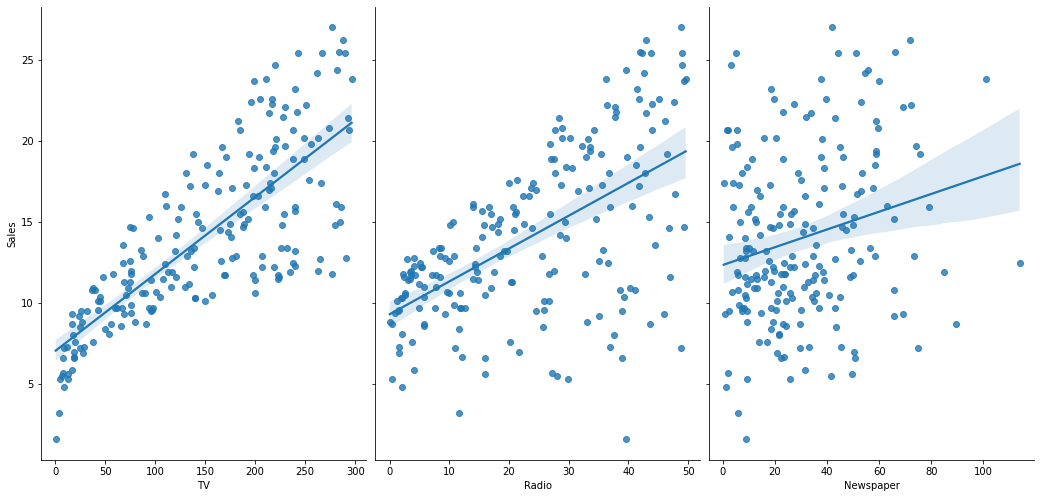

In [26]:
# plot graphs
import seaborn as sns

%matplotlib inline

sns.pairplot(data,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],size=7,aspect=0.7,kind='reg')